In [1]:
import pandas as pd
import numpy as np
import pyranges
import pickle
import os.path
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
hicLoops = pd.read_csv('./Dataset/merged_loops.bedpe',delimiter='\t')
ctcfPeaks = pyranges.read_bed('./Dataset/ENCFF356LIU.bed').df
chiaPetLoops = pd.read_csv('./Dataset/4DNFIS9CCN6R.bedpe',delimiter='\t', header=None)
rad21Peaks=pyranges.read_bed('./Dataset/ENCFF834GOT.bed').df

hicLoops=hicLoops[1:]
chiaPetLoops.columns = ['#chr1','x1','x2','chr2','y1','y2','?']

/home/patryk/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}
/home/patryk/.local/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}


In [3]:
hicLoops.describe()

,x1,x2,y1,y2,observed,expectedBL,expectedDonut,expectedH,expectedV,fdrBL,fdrDonut,fdrH,fdrV,numCollapsed,centroid1,centroid2,radius
count,1.523300e+04,1.523300e+04,1.523300e+04,1.523300e+04,15233.000000,15233.000000,15233.000000,15233.000000,15233.000000,1.523300e+04,1.523300e+04,1.523300e+04,1.523300e+04,15233.000000,1.523300e+04,1.523300e+04,15233.000000
mean,8.023923e+07,8.024604e+07,8.056954e+07,8.057634e+07,49.292851,14.441595,13.730485,16.156956,16.177253,1.515598e-03,8.044017e-04,3.837139e-03,3.918780e-03,3.421125,8.024247e+07,8.057295e+07,5258.220902
std,5.562852e+07,5.562856e+07,5.563722e+07,5.563726e+07,26.412381,11.156909,10.798754,12.620653,12.632769,6.722955e-03,4.786342e-03,1.191544e-02,1.214914e-02,3.157286,5.562852e+07,5.563730e+07,4993.398707
min,1.150000e+05,1.200000e+05,1.800000e+05,1.850000e+05,11.000000,0.012426,0.011332,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.135000e+05,1.785000e+05,0.000000
25%,3.606000e+07,3.607000e+07,3.628000e+07,3.628500e+07,30.000000,6.784028,6.482804,7.728960,7.659216,3.707830e-11,1.158524e-11,3.541425e-09,3.695817e-09,1.000000,3.606500e+07,3.628250e+07,0.000000
50%,7.008500e+07,7.009000e+07,7.048000e+07,7.049000e+07,43.000000,11.354755,10.619547,12.668986,12.811413,9.370300e-07,3.542509e-07,2.030877e-05,2.222786e-05,2.000000,7.009000e+07,7.048500e+07,5000.000000
75%,1.158700e+08,1.158800e+08,1.162300e+08,1.162400e+08,61.000000,18.363478,17.439386,20.525497,20.593340,1.513941e-04,5.098404e-05,1.285796e-03,1.222071e-03,4.000000,1.158738e+08,1.162400e+08,8221.000000
max,2.474400e+08,2.474450e+08,2.475700e+08,2.475800e+08,271.000000,98.571365,92.682210,112.373390,115.471070,9.179866e-02,8.108640e-02,9.565513e-02,9.604326e-02,26.000000,2.474425e+08,2.475750e+08,51271.000000


In [4]:
ctcfPeaks.describe()

,Start,End,Score,ThickStart,ThickEnd,ItemRGB,BlockCount
count,4.094900e+04,4.094900e+04,40949.000000,40949.000000,40949.0,40949.000000,40949.000000
mean,7.831949e+07,7.831980e+07,961.238834,73.253416,-1.0,4.246728,154.052187
std,5.596081e+07,5.596081e+07,103.619231,56.206305,0.0,0.924962,40.835497
min,1.144400e+04,1.179400e+04,537.000000,3.891950,-1.0,-0.142540,1.000000
25%,3.378754e+07,3.378769e+07,1000.000000,26.886680,-1.0,4.252250,175.000000
50%,6.739370e+07,6.739406e+07,1000.000000,56.959440,-1.0,4.690030,175.000000
75%,1.155417e+08,1.155420e+08,1000.000000,108.935150,-1.0,4.690030,175.000000
max,2.489248e+08,2.489251e+08,1000.000000,493.698390,-1.0,4.690030,460.000000


In [5]:
chiaPetLoops.describe()

,x1,x2,y1,y2,?
count,5.815083e+06,5.815083e+06,5.815083e+06,5.815083e+06,5.815083e+06
mean,7.780002e+07,7.780060e+07,8.380769e+07,8.380828e+07,1.223357e+00
std,5.542503e+07,5.542503e+07,5.649045e+07,5.649044e+07,1.361738e+00
min,0.000000e+00,1.320000e+02,7.642000e+03,8.559000e+03,1.000000e+00
25%,3.330289e+07,3.330345e+07,3.827097e+07,3.827151e+07,1.000000e+00
50%,6.742149e+07,6.742206e+07,7.406263e+07,7.406324e+07,1.000000e+00
75%,1.134992e+08,1.134999e+08,1.209587e+08,1.209593e+08,1.000000e+00
max,2.489168e+08,2.489174e+08,2.489342e+08,2.489348e+08,1.898000e+03


In [6]:
rad21Peaks.describe()

,Start,End,Score,ThickStart,ThickEnd,ItemRGB,BlockCount
count,3.462300e+04,3.462300e+04,34623.000000,34623.000000,34623.0,34623.000000,34623.000000
mean,7.850383e+07,7.850407e+07,944.956849,61.054135,-1.0,3.738735,118.721255
std,5.574411e+07,5.574411e+07,122.152293,48.439246,0.0,0.878939,28.875827
min,1.870400e+04,1.896800e+04,540.000000,4.231500,-1.0,-0.015850,1.000000
25%,3.396428e+07,3.396454e+07,1000.000000,22.078885,-1.0,3.313005,132.000000
50%,6.820523e+07,6.820550e+07,1000.000000,44.551970,-1.0,3.827920,132.000000
75%,1.144681e+08,1.144683e+08,1000.000000,88.545570,-1.0,4.491820,132.000000
max,2.489248e+08,2.489250e+08,1000.000000,334.213290,-1.0,4.491820,164.000000


In [7]:
ctcfPeaks['Chromosome']=ctcfPeaks['Chromosome'].apply(lambda x: x.removeprefix('chr'))
rad21Peaks['Chromosome']=rad21Peaks['Chromosome'].apply(lambda x: x.removeprefix('chr'))
chiaPetLoops['#chr1']=chiaPetLoops['#chr1'].apply(lambda x: x.removeprefix('chr'))
chiaPetLoops['chr2']=chiaPetLoops['chr2'].apply(lambda x: x.removeprefix('chr'))

In [8]:
print(ctcfPeaks.head())
print(rad21Peaks.head())
print(chiaPetLoops.head())
print(hicLoops.head())

  Chromosome      Start        End Name  Score Strand  ThickStart  ThickEnd  \
0          1  177429483  177429833    .    611      .     3.96905      -1.0   
1          1   84224251   84224601    .    855      .     3.99064      -1.0   
2          1  236425556  236425906    .    668      .     4.03628      -1.0   
3          1    6634797    6635147    .   1000      .     4.17682      -1.0   
4          1  154478854  154479204    .   1000      .     4.18657      -1.0   

   ItemRGB  BlockCount  
0 -0.12232         175  
1 -0.11580         175  
2 -0.12009         175  
3 -0.12427         175  
4 -0.12400         175  
  Chromosome      Start        End Name  Score Strand  ThickStart  ThickEnd  \
0          1   93814064   93814272    .   1000      .   267.49725      -1.0   
1          1  119367581  119367784    .   1000      .   256.48546      -1.0   
2          1   23544795   23544995    .   1000      .   253.97355      -1.0   
3          1   11037696   11037897    .   1000      .   245

1. Given a loop, consider chr1, x1, x2, chr2, y1, y2
2. For each row check whether a matching peak has an anchor in chr1 or chr2 or both

In [21]:
def getAnchors(loops,peaks):
    bothAnchorsIndexes = []
    singleAnchorCount=0
    for i,loop in loops.iterrows():
        anchor1=False
        anchor2=False
        sameChromosome = peaks[peaks['Chromosome']==loop['#chr1']]

        

        x1=sameChromosome[sameChromosome['Start']>=loop['x1']]
        x2=x1[x1['Start']<=loop['x2']]
        
        x1 = x2[x2['End']>=loop['x1']]
        x2 = x1[x1['End']<=loop['x2']]

        if len(x2) > 0:

            anchor1=True
        """ else:
            x1=sameChromosome[sameChromosome['End']>=loop['x1']]
            x2=x1[x1['End']<=loop['x2']]
            if len(x2) > 0:
                anchor1=True """


        sameChromosome = peaks[peaks['Chromosome']==loop['chr2']]
        x1=sameChromosome[sameChromosome['Start']>=loop['y1']]
        x2=x1[x1['Start']<=loop['y2']]

        x1 = x2[x2['End']>=loop['y1']]
        x2 = x1[x1['End']<=loop['y2']]

        if len(x2) > 0:
            anchor2=True
        """ else:
            x1=sameChromosome[sameChromosome['End']>=loop['y1']]
            x2=x1[x1['End']<=loop['y2']]
            if len(x2) > 0:
                anchor2=True
 """


        if anchor1 == True and anchor2 == True:
            bothAnchorsIndexes.append(i)
            singleAnchorCount+=1
        elif anchor1 == True or anchor2 == True:
            singleAnchorCount+=1
    return bothAnchorsIndexes, singleAnchorCount

In [23]:
peakLoopHicLCtcfPPairs,peakLoopHicLCtcfPSingleAnchorCount = getAnchors(hicLoops,ctcfPeaks)
with open("peakLoopHicLCtcfPPairs", "wb") as f:
    pickle.dump(peakLoopHicLCtcfPPairs, f)
with open("peakLoopHicLCtcfPSingleAnchorCount", "wb") as f:
    pickle.dump(peakLoopHicLCtcfPSingleAnchorCount, f)

In [24]:
print(len(peakLoopHicLCtcfPPairs))

8374


In [25]:
peakLoopHicLRad21PPairs,peakLoopHicLRad21PSingleAnchorCount = getAnchors(hicLoops,rad21Peaks)
with open("peakLoopHicLRad21PPairs", "wb") as f:
    pickle.dump(peakLoopHicLRad21PPairs, f)
with open("peakLoopHicLRad21PSingleAnchorCount", "wb") as f:
    pickle.dump(peakLoopHicLRad21PSingleAnchorCount, f)

In [26]:
print(len(peakLoopHicLRad21PPairs))

8377


In [27]:
peakLoopChiaLCtcfPPairs,peakLoopChiaLCtcfPSingleAnchorCount = getAnchors(chiaPetLoops,ctcfPeaks)
with open("peakLoopChiaLCtcfPPairs", "wb") as f:
    pickle.dump(peakLoopChiaLCtcfPPairs, f)
with open("peakLoopChiaLCtcfPSingleAnchorCount", "wb") as f:
    pickle.dump(peakLoopChiaLCtcfPSingleAnchorCount, f)

In [28]:
print(len(peakLoopChiaLCtcfPPairs))

9520


In [29]:
peakLoopChiaLRad21PPairs,peakLoopChiaLRad21PSingleAnchorCount = getAnchors(chiaPetLoops,rad21Peaks)
with open("peakLoopChiaLRad21PPairs", "wb") as f:
    pickle.dump(peakLoopChiaLRad21PPairs, f)
with open("peakLoopChiaLRad21PSingleAnchorCount", "wb") as f:
    pickle.dump(peakLoopChiaLRad21PSingleAnchorCount, f)

In [30]:
print(len(peakLoopChiaLRad21PPairs))

9756


Perform 4 comparisons between datasets. for two compared datasets (A and B) calculate how many loops from A match (**) some loop from B, and how many loops from B match some loop from A. You can present the result as a 2x2 table showing counts of total and matched loops for datasets.

In [8]:
with open(r"peakLoopChiaLCtcfPPairs", "rb") as input_file: # Chia Ctcf
     peakLoopChiaLCtcfPPairs = pickle.load(input_file)

with open(r"peakLoopHicLCtcfPPairs", "rb") as input_file: # HIC Ctcf
     peakLoopHicLCtcfPPairs = pickle.load(input_file)

with open(r"peakLoopChiaLRad21PPairs", "rb") as input_file: # CHIA Rad
     peakLoopChiaLRad21PPairs = pickle.load(input_file)

with open(r"peakLoopHicLRad21PPairs", "rb") as input_file: # Hic Rad
     peakLoopHicLRad21PPairs = pickle.load(input_file)

TODO:

1. Add results for single anchors

In [9]:
# Adjust index positions
peakLoopChiaLCtcfPPairs=[x - 1 for x in peakLoopChiaLCtcfPPairs]
peakLoopHicLCtcfPPairs=[x - 1 for x in peakLoopHicLCtcfPPairs]
peakLoopChiaLRad21PPairs=[x - 1 for x in peakLoopChiaLRad21PPairs]
peakLoopHicLRad21PPairs=[x - 1 for x in peakLoopHicLRad21PPairs]

In [10]:
pairsIndexes = [{'loopDataset1':hicLoops,'loopDataset2':hicLoops,'filteredIndexes1':peakLoopHicLCtcfPPairs,'filteredIndexes2':peakLoopHicLRad21PPairs,'filename':'hicLcHicRadIndex'},
                {'loopDataset1':chiaPetLoops,'loopDataset2':chiaPetLoops,'filteredIndexes1':peakLoopChiaLCtcfPPairs,'filteredIndexes2':peakLoopChiaLRad21PPairs, 'filename':'chiaLcChiaRadCount'},
                {'loopDataset1':chiaPetLoops,'loopDataset2':hicLoops,'filteredIndexes1':peakLoopChiaLCtcfPPairs,'filteredIndexes2':peakLoopHicLCtcfPPairs,'filename':'chiaLcHicLcCount'},
                {'loopDataset1':chiaPetLoops,'loopDataset2':hicLoops,'filteredIndexes1':peakLoopChiaLRad21PPairs,'filteredIndexes2':peakLoopHicLCtcfPPairs,'filename':'chiaRadHicLdCount'},
                {'loopDataset1':chiaPetLoops,'loopDataset2':hicLoops,'filteredIndexes1':peakLoopChiaLRad21PPairs,'filteredIndexes2':peakLoopHicLRad21PPairs,'filename':'chiaLcRadHicRadCount'}]

In [11]:
descriptions = [{'loop1':'Hic','peak1':'Ctcf','loop2':'Hic','peak2':'Rad21'},
                {'loop1':'ChiaPet','peak1':'Ctcf','loop2':'ChiaPet','peak2':'Rad21'},
                {'loop1':'ChiaPet','peak1':'Ctcf','loop2':'Hic','peak2':'Ctcf'},
                {'loop1':'ChiaPet','peak1':'Rad21','loop2':'Hic','peak2':'Ctcf'},
                {'loop1':'ChiaPet','peak1':'Rad21','loop2':'Hic','peak2':'Rad21'},
             ]

In [15]:
def compareFilteredLoops(loopDataset1, loopDataset2, filteredIndexes1, filteredIndexes2, filename, threshold):
    countOfMatchedLoopsBothAnchors = 0
    countOfMatchedLoopsAtLeastSingleAnchor = 0
    for index1 in filteredIndexes1:
        for index2 in filteredIndexes2:
            if loopDataset1.iloc[index1]['#chr1']==loopDataset2.iloc[index2]['#chr1'] and loopDataset1.iloc[index1]['chr2']==loopDataset2.iloc[index2]['chr2']:
                middleX1 = abs(loopDataset1.iloc[index1]['x1']+loopDataset1.iloc[index1]['x2'])/2
                middleY1 = abs(loopDataset1.iloc[index1]['y1']+loopDataset1.iloc[index1]['y2'])/2
                middleX2 = abs(loopDataset2.iloc[index2]['x1']+loopDataset2.iloc[index2]['x2'])/2
                middleY2 = abs(loopDataset2.iloc[index2]['y1']+loopDataset2.iloc[index2]['y2'])/2
                
                if abs(middleX1-middleX2)<=threshold:
                    countOfMatchedLoopsAtLeastSingleAnchor+=1
                    if abs(middleY1-middleY2)<=threshold:
                        countOfMatchedLoopsBothAnchors+=1
                elif abs(middleY2-middleY1)<=threshold:
                    countOfMatchedLoopsAtLeastSingleAnchor+=1
    with open(r""+str(filename)+"-"+str(threshold), "wb") as input_file:
        pickle.dump(countOfMatchedLoopsBothAnchors,input_file)
    with open(r"single-"+str(filename)+"-"+str(threshold), "wb") as input_file:
        pickle.dump(countOfMatchedLoopsAtLeastSingleAnchor,input_file)
    return countOfMatchedLoopsAtLeastSingleAnchor, countOfMatchedLoopsBothAnchors

In [12]:
thresholds=[5000,10000]

In [17]:
results=[]

for threshold in thresholds:
    for pairIndex in pairsIndexes:
        atLeastSingleAnchorCount, bothAnchorsCount = compareFilteredLoops(**pairIndex,threshold=threshold)
        results.append([atLeastSingleAnchorCount,bothAnchorsCount])
        print('Finished: ' +str(pairIndex['filename'])+", with threshold: "+str(threshold))

Finished: hicLcHicRadIndex, with threshold: 5000
Finished: chiaLcChiaRadCount, with threshold: 5000
Finished: chiaLcHicLcCount, with threshold: 5000
Finished: chiaRadHicLdCount, with threshold: 5000
Finished: chiaLcRadHicRadCount, with threshold: 5000
Finished: hicLcHicRadIndex, with threshold: 10000
Finished: chiaLcChiaRadCount, with threshold: 10000
Finished: chiaLcHicLcCount, with threshold: 10000
Finished: chiaRadHicLdCount, with threshold: 10000
Finished: chiaLcRadHicRadCount, with threshold: 10000


In [13]:
results=[]
for threshold in thresholds:
    for i,pairIndex in enumerate(pairsIndexes):
        with open(pairIndex['filename']+"-"+str(threshold), "rb") as input_file: # Chia Rad Hic Rad
            result = pickle.load(input_file)
        with open(pairIndex['filename']+"-"+str(threshold), "rb") as input_file: # Chia Rad Hic Rad
            single = pickle.load(input_file)
        results.append([result,len(pairIndex['filteredIndexes1']),len(pairIndex['filteredIndexes2']),descriptions[i]['loop1'],descriptions[i]['loop2'],descriptions[i]['peak1'],descriptions[i]['peak2'],threshold])

In [14]:
resultsDf=pd.DataFrame(results,columns=['matched','count1','count2','loop1','loop2','peak1','peak2','threshold'])

In [15]:
for i,result in resultsDf.iterrows():
    print(result['loop1']+" filtered by " +result['peak1']+" vs "+result['loop2']+" filtered by "+result['peak2'])
    print("\t"+result['loop1']+" filtered by "+result['peak1']+" total: "+str(result['count1']))
    print("\t"+result['loop2']+" filtered by "+result['peak2']+" total: "+str(result['count2']))
    print("\tMatched: "+str(result['matched']))
    print("\n")

Hic filtered by Ctcf vs Hic filtered by Rad21
	Hic filtered by Ctcf total: 8374
	Hic filtered by Rad21 total: 8377
	Matched: 7707


ChiaPet filtered by Ctcf vs ChiaPet filtered by Rad21
	ChiaPet filtered by Ctcf total: 9520
	ChiaPet filtered by Rad21 total: 9756
	Matched: 7910


ChiaPet filtered by Ctcf vs Hic filtered by Ctcf
	ChiaPet filtered by Ctcf total: 9520
	Hic filtered by Ctcf total: 8374
	Matched: 1661


ChiaPet filtered by Rad21 vs Hic filtered by Ctcf
	ChiaPet filtered by Rad21 total: 9756
	Hic filtered by Ctcf total: 8374
	Matched: 1720


ChiaPet filtered by Rad21 vs Hic filtered by Rad21
	ChiaPet filtered by Rad21 total: 9756
	Hic filtered by Rad21 total: 8377
	Matched: 1799


Hic filtered by Ctcf vs Hic filtered by Rad21
	Hic filtered by Ctcf total: 8374
	Hic filtered by Rad21 total: 8377
	Matched: 7707


ChiaPet filtered by Ctcf vs ChiaPet filtered by Rad21
	ChiaPet filtered by Ctcf total: 9520
	ChiaPet filtered by Rad21 total: 9756
	Matched: 8898


ChiaPet filtered by 

In [16]:
resultsBar=[]
for i,result in enumerate(results):
    resultsBar.append([result[3]+"-" +result[5]+" vs "+result[4]+"-"+result[6],result[0],i,result[7]])
    resultsBar.append([result[3]+" by "+result[5],result[1],i,result[7]])
    resultsBar.append([result[4]+" by "+result[6],result[2],i,result[7]])

In [17]:
resultsBarDf=pd.DataFrame(resultsBar,columns=['description','result','series','threshold'])

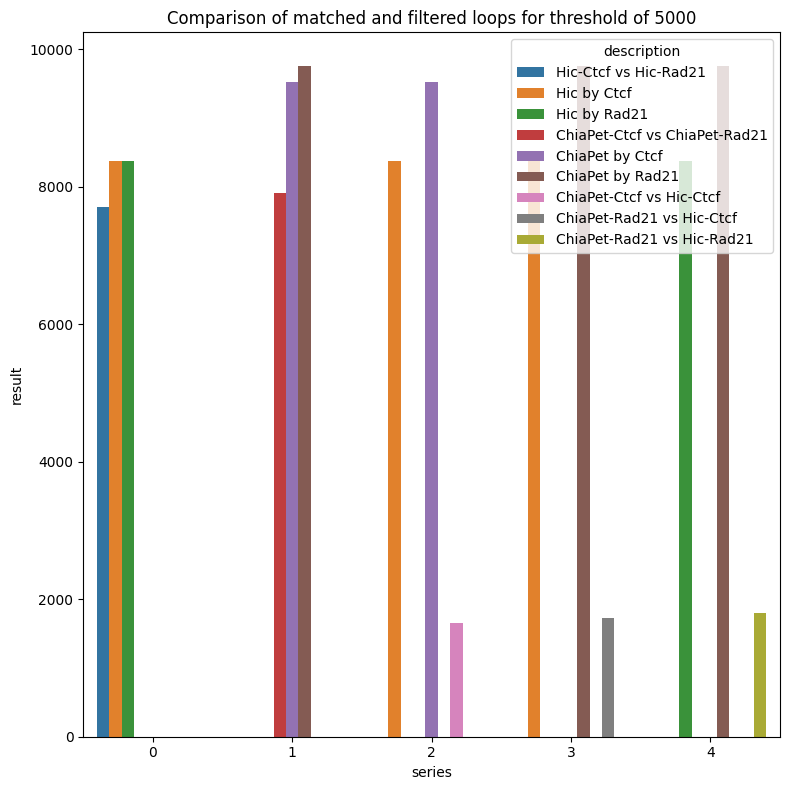

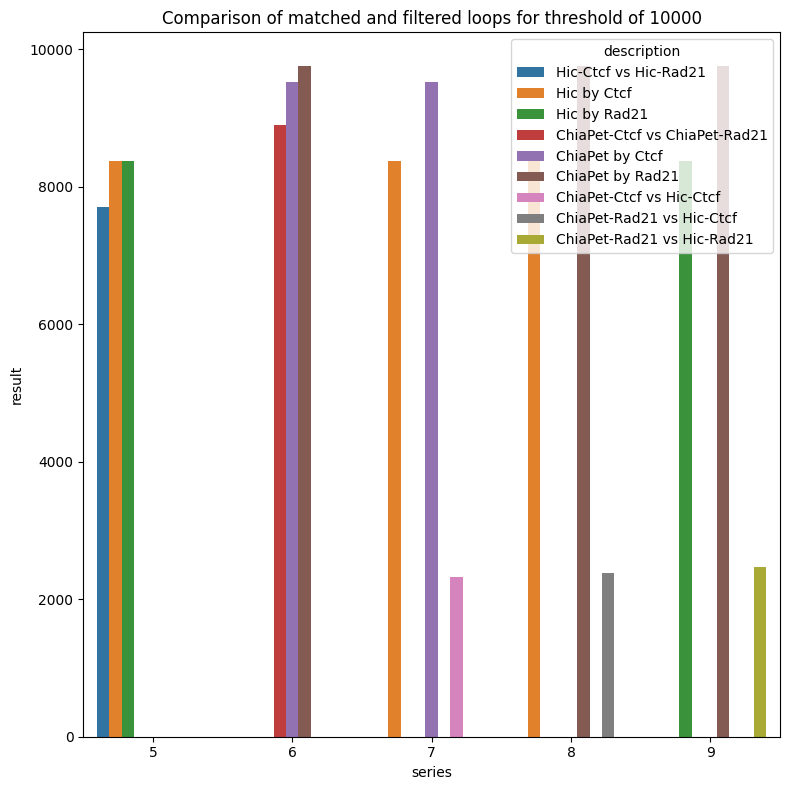

In [18]:
plt.figure(figsize=(8,8))
plt.title('Comparison of matched and filtered loops for threshold of 5000')

sns.barplot(data=resultsBarDf[resultsBarDf['threshold']==5000],x='series',y='result',hue='description')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,8))
plt.title('Comparison of matched and filtered loops for threshold of 10000')

sns.barplot(data=resultsBarDf[resultsBarDf['threshold']==10000],x='series',y='result',hue='description')
plt.tight_layout()
plt.show()

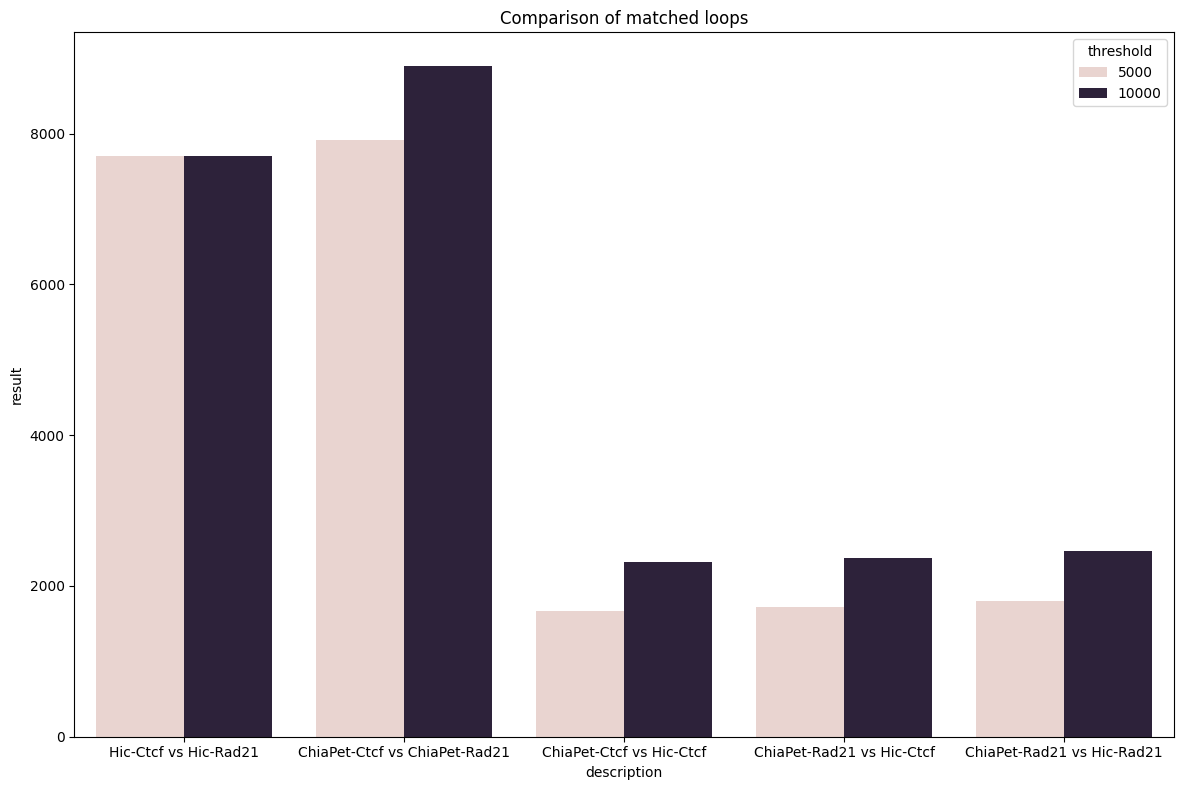

In [19]:
plt.figure(figsize=(12,8))
plt.title('Comparison of matched loops')
filteredData=resultsBarDf[resultsBarDf['description'].str.contains('vs', na = False)]
sns.barplot(data=filteredData,x='description',y='result',hue='threshold')
plt.tight_layout()
plt.show()

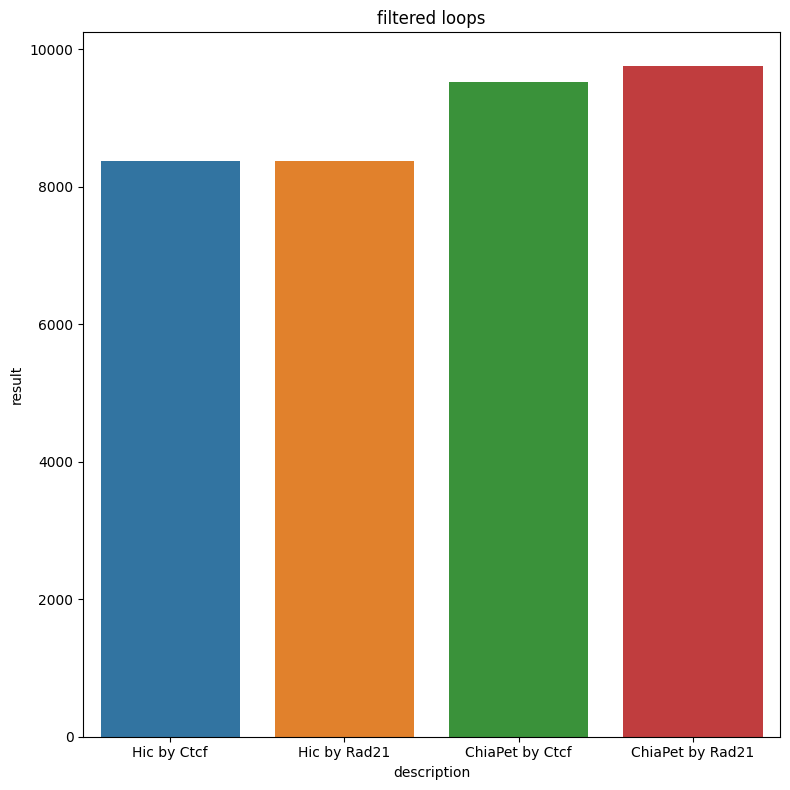

In [20]:
plt.figure(figsize=(8,8))
plt.title('filtered loops')
filteredData=resultsBarDf[resultsBarDf['description'].str.contains('by', na = False)]
sns.barplot(data=filteredData[filteredData['threshold']==5000],x='description',y='result',hue='description')
plt.tight_layout()
plt.show()


Make a visualization of a selected region (e.g. in IGV), choose something that looks nicely, zoom in enough so that you can see the peak locations. You can also include the loops matched between 2 datasets.

In [21]:
chiaPetLoops.iloc[peakLoopChiaLCtcfPPairs[0]]

#chr1         10
x1       2927863
x2       2928484
chr2          10
y1       3036017
y2       3036561
?              1
Name: 5191, dtype: object